<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_iris()
df = pd.DataFrame(data= dataset.data)

In [3]:
df["target"] = dataset.target

In [4]:
X = df.iloc[:, :-1]
y = df["target"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.60,
                                                    shuffle=True,
                                                    random_state=24)

# instantiating the model
clf = RandomForestClassifier(random_state=24)

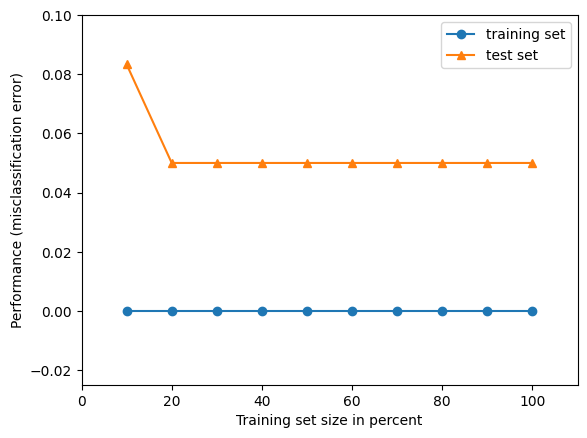

In [6]:
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     print_model=False)
plt.ylim(top=0.1, bottom=-0.025)
plt.show()

Mean Squared Error: 9.762853674412973n


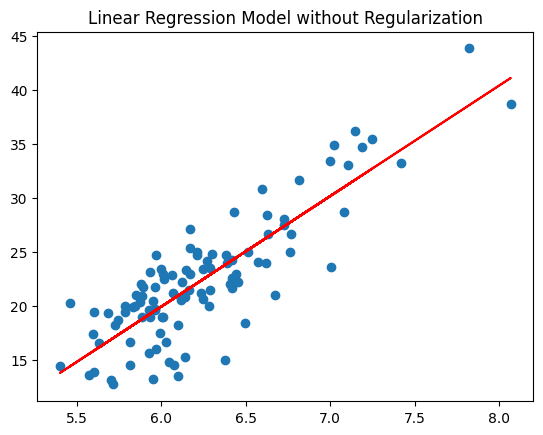

In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# reading data into pandas dataframe
df = pd.read_csv(URL, header=None)

# selecting a single feature
# only using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label

# reshaping the data
X_reshaped = X[:, np.newaxis]
y_reshaped = y[:, np.newaxis]

# instantiating the linear regression model
linear_regression = LinearRegression()

# training the model
linear_regression.fit(X_reshaped, y_reshaped)

# making predictions on the training data
y_pred = linear_regression.predict(X_reshaped)

# evaluating the model performance
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}n")

#print(type(X))
# plotting the line of best fit given by linear regression
#sns.scatterplot(X,y)
plt.scatter(X,y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model without Regularization")
plt.show()


Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]n


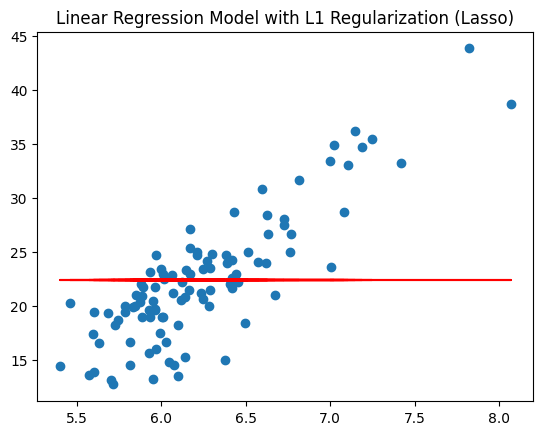

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# selecting a single feature
# using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label

# reshaping the data
X_reshaped = X[:, np.newaxis]
y_reshaped = y[:, np.newaxis]

# instantiating the lasso regression model
lasso = Lasso(alpha=10)

# training the model
lasso.fit(X_reshaped, y_reshaped)

# making predictions
y_pred = lasso.predict(X_reshaped)

# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}n")

# plotting the line of best fit
plt.scatter(X,y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show()